# Divisão do Dataset por Tipos de Code Smells

Este notebook divide o dataset `dataset_ml_dl_v33.csv` em dois datasets separados:
1. **Dataset Long Method**: contém `long-method` e `non-long-method`
2. **Dataset Long Parameter List**: contém `long-parameter-list` e `non-long-parameter-list`

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. Carregar e Explorar o Dataset Original

In [2]:
# Carregar o dataset original
dataset_path = Path('dataset_ml_dl_v33.csv')
df_original = pd.read_csv(dataset_path)

print(f"Dataset original carregado!")
print(f"Shape: {df_original.shape}")
print(f"Colunas: {list(df_original.columns)}")
print(f"\nPrimeiras 5 linhas:")
df_original.head()

Dataset original carregado!
Shape: (11526, 14)
Colunas: ['raw_sloc', 'raw_multi', 'raw_blank', 'raw_single_comments', 'hal_func_N2', 'hal_func_vocabulary', 'hal_func_length', 'hal_func_calculated_length', 'hal_func_volume', 'hal_func_difficulty', 'hal_func_effort', 'hal_func_time', 'hal_func_bugs', 'smell_label']

Primeiras 5 linhas:


,raw_sloc,raw_multi,raw_blank,raw_single_comments,hal_func_N2,hal_func_vocabulary,hal_func_length,hal_func_calculated_length,hal_func_volume,hal_func_difficulty,hal_func_effort,hal_func_time,hal_func_bugs,smell_label
0,3,9,3,0,0,0,0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,non-long-method
1,13,0,1,0,2,3,3,2.0,4.754888,0.5,2.377444,0.13208,0.001585,non-long-method
2,11,0,0,0,2,3,3,2.0,4.754888,0.5,2.377444,0.13208,0.001585,non-long-method
3,5,0,0,0,2,3,3,2.0,4.754888,0.5,2.377444,0.13208,0.001585,non-long-method
4,4,12,2,0,0,0,0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,non-long-method


Distribuição dos tipos de code smells:
smell_label
non-long-parameter-list    10480
non-long-method              533
long-method                  297
long-parameter-list          216
Name: count, dtype: int64


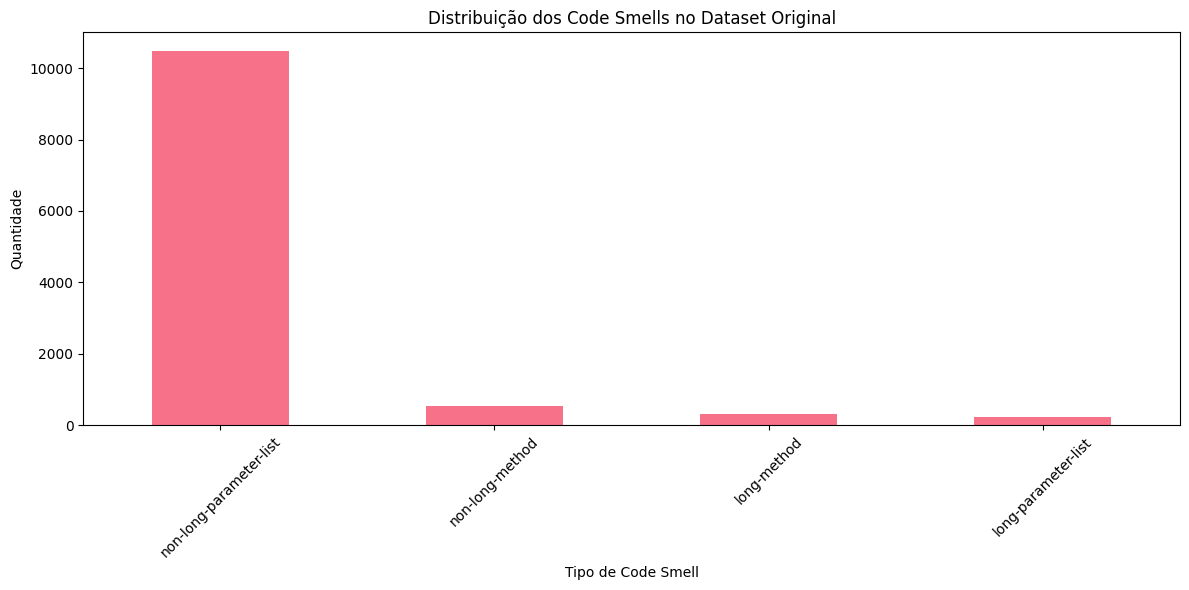


Valores nulos por coluna:
raw_sloc                      0
raw_multi                     0
raw_blank                     0
raw_single_comments           0
hal_func_N2                   0
hal_func_vocabulary           0
hal_func_length               0
hal_func_calculated_length    0
hal_func_volume               0
hal_func_difficulty           0
hal_func_effort               0
hal_func_time                 0
hal_func_bugs                 0
smell_label                   0
dtype: int64


In [3]:
# Verificar os tipos de smells e suas quantidades
print("Distribuição dos tipos de code smells:")
smell_counts = df_original['smell_label'].value_counts()
print(smell_counts)

# Visualizar a distribuição
plt.figure(figsize=(12, 6))
smell_counts.plot(kind='bar')
plt.title('Distribuição dos Code Smells no Dataset Original')
plt.xlabel('Tipo de Code Smell')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Verificar valores nulos
print(f"\nValores nulos por coluna:")
print(df_original.isnull().sum())

## 2. Criar Dataset para Long Method

In [4]:
# Filtrar dados para Long Method
long_method_labels = ['long-method', 'non-long-method']
df_long_method = df_original[df_original['smell_label'].isin(long_method_labels)].copy()

print(f"Dataset Long Method criado!")
print(f"Shape: {df_long_method.shape}")
print(f"\nDistribuição no dataset Long Method:")
print(df_long_method['smell_label'].value_counts())

# Criar labels binários para Long Method (1 = long-method, 0 = non-long-method)
df_long_method['target'] = df_long_method['smell_label'].apply(lambda x: 1 if x == 'long-method' else 0)

print(f"\nDistribuição após conversão binária:")
print(df_long_method['target'].value_counts())
print(f"Proporção de long-method: {df_long_method['target'].mean():.2%}")

Dataset Long Method criado!
Shape: (830, 14)

Distribuição no dataset Long Method:
smell_label
non-long-method    533
long-method        297
Name: count, dtype: int64

Distribuição após conversão binária:
target
0    533
1    297
Name: count, dtype: int64
Proporção de long-method: 35.78%


## 3. Criar Dataset para Long Parameter List

In [5]:
# Filtrar dados para Long Parameter List
long_param_labels = ['long-parameter-list', 'non-long-parameter-list']
df_long_param = df_original[df_original['smell_label'].isin(long_param_labels)].copy()

print(f"Dataset Long Parameter List criado!")
print(f"Shape: {df_long_param.shape}")
print(f"\nDistribuição no dataset Long Parameter List:")
print(df_long_param['smell_label'].value_counts())

# Criar labels binários para Long Parameter List (1 = long-parameter-list, 0 = non-long-parameter-list)
df_long_param['target'] = df_long_param['smell_label'].apply(lambda x: 1 if x == 'long-parameter-list' else 0)

print(f"\nDistribuição após conversão binária:")
print(df_long_param['target'].value_counts())
print(f"Proporção de long-parameter-list: {df_long_param['target'].mean():.2%}")

Dataset Long Parameter List criado!
Shape: (10696, 14)

Distribuição no dataset Long Parameter List:
smell_label
non-long-parameter-list    10480
long-parameter-list          216
Name: count, dtype: int64

Distribuição após conversão binária:
target
0    10480
1      216
Name: count, dtype: int64
Proporção de long-parameter-list: 2.02%


## 4. Análise Comparativa dos Datasets

C:\Users\Usuário\AppData\Local\Temp\ipykernel_20944\2253564842.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(['Long Method', 'Long Param'])
C:\Users\Usuário\AppData\Local\Temp\ipykernel_20944\2253564842.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(['Long Method', 'Long Param'])


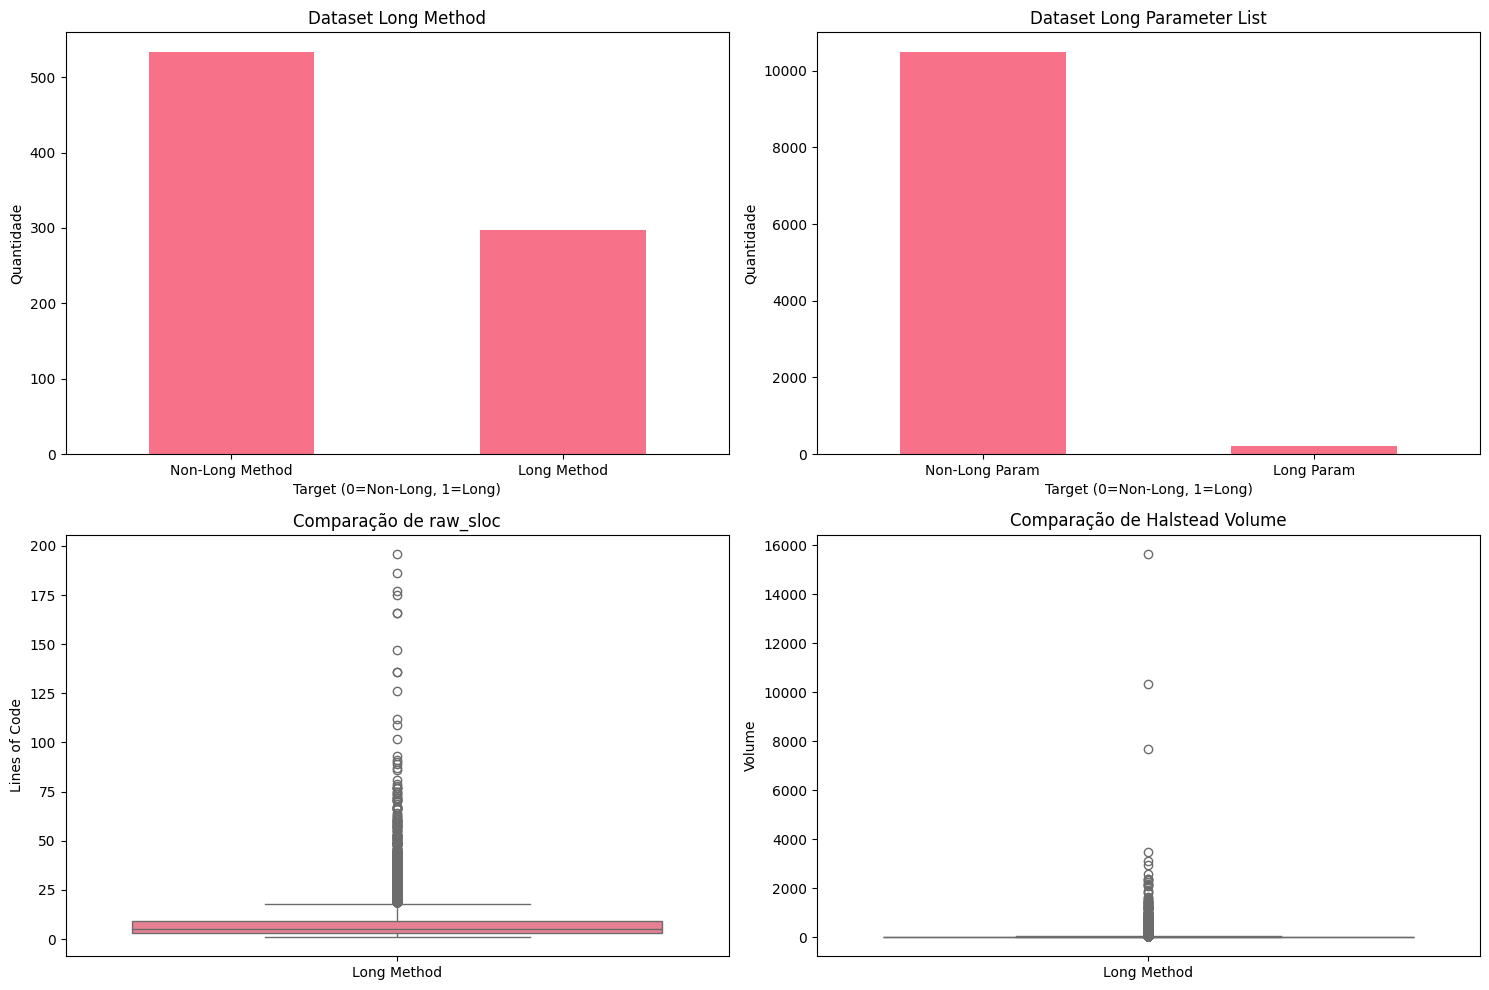

Estatísticas do Dataset Long Method:
         raw_sloc   raw_multi   raw_blank  raw_single_comments  hal_func_N2  \
count  830.000000  830.000000  830.000000           830.000000   830.000000   
mean    26.091566    9.037349    2.033735             0.027711    25.026506   
std     42.112364   23.227408    6.710726             0.171429    60.921586   
min      2.000000    0.000000    0.000000             0.000000     0.000000   
25%      3.000000    0.000000    0.000000             0.000000     0.000000   
50%      5.000000    0.000000    0.000000             0.000000     1.000000   
75%     52.000000    8.000000    2.000000             0.000000    22.000000   
max    480.000000  263.000000  105.000000             2.000000  1003.000000   

       hal_func_vocabulary  hal_func_length  hal_func_calculated_length  \
count           830.000000       830.000000                  830.000000   
mean             17.918072        39.067470                   99.073939   
std              39.729277

In [6]:
# Comparar estatísticas dos datasets
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição Long Method
df_long_method['target'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Dataset Long Method')
axes[0,0].set_xlabel('Target (0=Non-Long, 1=Long)')
axes[0,0].set_ylabel('Quantidade')
axes[0,0].set_xticklabels(['Non-Long Method', 'Long Method'], rotation=0)

# Distribuição Long Parameter List
df_long_param['target'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Dataset Long Parameter List')
axes[0,1].set_xlabel('Target (0=Non-Long, 1=Long)')
axes[0,1].set_ylabel('Quantidade')
axes[0,1].set_xticklabels(['Non-Long Param', 'Long Param'], rotation=0)

# Comparação de raw_sloc
sns.boxplot(data=[df_long_method['raw_sloc'], df_long_param['raw_sloc']], 
            ax=axes[1,0])
axes[1,0].set_title('Comparação de raw_sloc')
axes[1,0].set_ylabel('Lines of Code')
axes[1,0].set_xticklabels(['Long Method', 'Long Param'])

# Comparação de hal_func_volume
sns.boxplot(data=[df_long_method['hal_func_volume'], df_long_param['hal_func_volume']], 
            ax=axes[1,1])
axes[1,1].set_title('Comparação de Halstead Volume')
axes[1,1].set_ylabel('Volume')
axes[1,1].set_xticklabels(['Long Method', 'Long Param'])

plt.tight_layout()
plt.show()

# Estatísticas descritivas
print("Estatísticas do Dataset Long Method:")
print(df_long_method.describe())
print(f"\nEstatísticas do Dataset Long Parameter List:")
print(df_long_param.describe())

## 5. Salvar Datasets Resultantes

In [7]:
# Preparar datasets para salvamento (remover coluna target temporária)
df_long_method_save = df_long_method.drop('target', axis=1)
df_long_param_save = df_long_param.drop('target', axis=1)

# Salvar dataset Long Method
long_method_path = 'dataset_long_method.csv'
df_long_method_save.to_csv(long_method_path, index=False)
print(f"Dataset Long Method salvo como: {long_method_path}")
print(f"Shape: {df_long_method_save.shape}")
print(f"Distribuição: {df_long_method_save['smell_label'].value_counts().to_dict()}")

# Salvar dataset Long Parameter List  
long_param_path = 'dataset_long_parameter_list.csv'
df_long_param_save.to_csv(long_param_path, index=False)
print(f"\nDataset Long Parameter List salvo como: {long_param_path}")
print(f"Shape: {df_long_param_save.shape}")
print(f"Distribuição: {df_long_param_save['smell_label'].value_counts().to_dict()}")

Dataset Long Method salvo como: dataset_long_method.csv
Shape: (830, 14)
Distribuição: {'non-long-method': 533, 'long-method': 297}

Dataset Long Parameter List salvo como: dataset_long_parameter_list.csv
Shape: (10696, 14)
Distribuição: {'non-long-parameter-list': 10480, 'long-parameter-list': 216}


## 6. Verificação dos Arquivos Salvos

In [8]:
# Verificar se os arquivos foram salvos corretamente
print("Verificação dos arquivos salvos:")
print("="*50)

# Verificar dataset Long Method
df_verify_long_method = pd.read_csv(long_method_path)
print(f"\n✓ Dataset Long Method verificado:")
print(f"  - Arquivo: {long_method_path}")
print(f"  - Shape: {df_verify_long_method.shape}")
print(f"  - Colunas: {list(df_verify_long_method.columns)}")
print(f"  - Distribuição: {df_verify_long_method['smell_label'].value_counts().to_dict()}")

# Verificar dataset Long Parameter List
df_verify_long_param = pd.read_csv(long_param_path)
print(f"\n✓ Dataset Long Parameter List verificado:")
print(f"  - Arquivo: {long_param_path}")
print(f"  - Shape: {df_verify_long_param.shape}")
print(f"  - Colunas: {list(df_verify_long_param.columns)}")
print(f"  - Distribuição: {df_verify_long_param['smell_label'].value_counts().to_dict()}")

# Verificar soma total
total_registros = len(df_verify_long_method) + len(df_verify_long_param)
original_registros = len(df_original)
print(f"\n📊 Resumo da divisão:")
print(f"  - Dataset original: {original_registros} registros")
print(f"  - Dataset Long Method: {len(df_verify_long_method)} registros")
print(f"  - Dataset Long Parameter List: {len(df_verify_long_param)} registros")
print(f"  - Total nos datasets divididos: {total_registros} registros")
print(f"  - Diferença: {abs(total_registros - original_registros)} registros")

if total_registros == original_registros:
    print("\n✅ Divisão concluída com sucesso! Todos os registros foram preservados.")
else:
    print("\n⚠️  Atenção: Houve uma diferença na contagem de registros.")

Verificação dos arquivos salvos:

✓ Dataset Long Method verificado:
  - Arquivo: dataset_long_method.csv
  - Shape: (830, 14)
  - Colunas: ['raw_sloc', 'raw_multi', 'raw_blank', 'raw_single_comments', 'hal_func_N2', 'hal_func_vocabulary', 'hal_func_length', 'hal_func_calculated_length', 'hal_func_volume', 'hal_func_difficulty', 'hal_func_effort', 'hal_func_time', 'hal_func_bugs', 'smell_label']
  - Distribuição: {'non-long-method': 533, 'long-method': 297}

✓ Dataset Long Parameter List verificado:
  - Arquivo: dataset_long_parameter_list.csv
  - Shape: (10696, 14)
  - Colunas: ['raw_sloc', 'raw_multi', 'raw_blank', 'raw_single_comments', 'hal_func_N2', 'hal_func_vocabulary', 'hal_func_length', 'hal_func_calculated_length', 'hal_func_volume', 'hal_func_difficulty', 'hal_func_effort', 'hal_func_time', 'hal_func_bugs', 'smell_label']
  - Distribuição: {'non-long-parameter-list': 10480, 'long-parameter-list': 216}

📊 Resumo da divisão:
  - Dataset original: 11526 registros
  - Dataset Lon

## 7. Resumo Final

In [9]:
# Resumo final da divisão
print("🎯 RESUMO DA DIVISÃO DO DATASET")
print("="*60)
print(f"Dataset Original: dataset_ml_dl_v33.csv")
print(f"  - Total de registros: {len(df_original):,}")
print(f"  - Tipos de smells: {df_original['smell_label'].nunique()}")
print(f"  - Features: {len(df_original.columns) - 1}")

print(f"\n📂 Dataset 1: {long_method_path}")
print(f"  - Total de registros: {len(df_long_method_save):,}")
print(f"  - Long Method: {smell_counts['long-method']:,} ({smell_counts['long-method']/len(df_long_method_save):.1%})")
print(f"  - Non-Long Method: {smell_counts['non-long-method']:,} ({smell_counts['non-long-method']/len(df_long_method_save):.1%})")

print(f"\n📂 Dataset 2: {long_param_path}")
print(f"  - Total de registros: {len(df_long_param_save):,}")
print(f"  - Long Parameter List: {smell_counts['long-parameter-list']:,} ({smell_counts['long-parameter-list']/len(df_long_param_save):.1%})")
print(f"  - Non-Long Parameter List: {smell_counts['non-long-parameter-list']:,} ({smell_counts['non-long-parameter-list']/len(df_long_param_save):.1%})")

print(f"\n✨ Operação concluída com sucesso!")
print(f"   Os datasets estão prontos para uso em treinamentos de ML separados.")

🎯 RESUMO DA DIVISÃO DO DATASET
Dataset Original: dataset_ml_dl_v33.csv
  - Total de registros: 11,526
  - Tipos de smells: 4
  - Features: 13

📂 Dataset 1: dataset_long_method.csv
  - Total de registros: 830
  - Long Method: 297 (35.8%)
  - Non-Long Method: 533 (64.2%)

📂 Dataset 2: dataset_long_parameter_list.csv
  - Total de registros: 10,696
  - Long Parameter List: 216 (2.0%)
  - Non-Long Parameter List: 10,480 (98.0%)

✨ Operação concluída com sucesso!
   Os datasets estão prontos para uso em treinamentos de ML separados.
